In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
cwd = os.getcwd()
print(cwd)
all_benchs = ['qsort', 'susan', 'randacc500k', 'randacc600k','cg', 'bzip2d', 'dijkstra', 'consumer']

/home/marta/runahead/plotting_stats


In [3]:
def parse_single_patfile(file_location):
    with open(file_location, "r") as file:
        lines = file.readlines()
        return lines
def parse_pat_directory(top_level_mcpat_path):
    data = {}
    for file in os.listdir(top_level_mcpat_path):
        f = os.path.join(top_level_mcpat_path, file)
        lines = parse_single_patfile(f)
        data[file[:-4]] = lines

    return data

In [4]:
mcpat_data = parse_pat_directory('/home/marta/runahead/parsing_data/mcpat_out/')
benchmarks = list(mcpat_data.keys())
print(benchmarks)

['base_dijkstra_rob128_64kB', 'pre_randacc200k_rob192_64kB', 'pre_qsort_rob192_128kB', 'pre_randacc200k_rob96_64kB', 'base_consumer_rob160_256kB', 'base_cg_rob64_64kB', 'run_hj2_rob128_256kB', 'run_bzip2d_rob96_256kB', 'pre_susan_rob160_64kB', 'run_randacc500k_rob192_64kB', 'run_susan_rob64_128kB', 'base_randacc600k_rob128_64kB', 'base_dijkstra_rob96_64kB', 'base_randacc200k_rob96_64kB', 'pre_randacc600k_rob160_256kB', 'run_randacc500k_rob160_256kB', 'run_is_rob64_128kB', 'pre_hj2_rob64_64kB', 'pre_bzip2d_rob160_128kB', 'run_dijkstra_rob160_256kB', 'base_is_rob128_256kB', 'run_hj2_rob192_64kB', 'base_randacc500k_rob96_128kB', 'run_consumer_rob160_64kB', 'pre_bzip2d_rob64_64kB', 'base_hj2_rob160_256kB', 'pre_dijkstra_rob64_64kB', 'base_qsort_rob96_64kB', 'pre_randacc200k_rob192_256kB', 'base_randacc200k_rob192_256kB', 'base_cg_rob96_64kB', 'base_randacc200k_rob128_256kB', 'base_susan_rob160_64kB', 'run_susan_rob192_64kB', 'run_consumer_rob128_128kB', 'run_susan_rob96_256kB', 'run_is_rob

In [5]:
def get_line_with_first_occurrence(lines, feature_name):
    for line in lines:
        if feature_name in line:
            return line
    
    return None

def extract_float_value_from_text(text):
    try:
        tokens = text.split()
    except AttributeError:
        # Empty file
        return 0.0
    values = []
    for token in tokens:
        try:
            values.append(float(token))
        except ValueError:
            pass
    
    # make sure there is just one statistic per line
    assert len(values) == 1
    return values[0]

def get_feature_statistics(feature_name):
    data = {}
    for bench in benchmarks:
        first_occ_in_bench = get_line_with_first_occurrence(mcpat_data[bench], feature_name)
        feature_value = extract_float_value_from_text(first_occ_in_bench)
        data[bench] = feature_value
        
    return data

In [6]:
data = get_feature_statistics('Runtime Dynamic')

In [7]:
all_benchs = ['qsort', 'susan', 'randacc500k', 'randacc600k','cg', 'bzip2d', 'dijkstra', 'consumer']

def clean_names(data):
    benchmark_columns_divided = [line.split('_') for line in data.keys()]
    
    def get_entries(which_col):
        entries = [line[which_col] for line in benchmark_columns_divided]
        return entries

    def extract_number(cryptic_name):
        try:
            return int(''.join(filter(str.isdigit, cryptic_name)))
        except ValueError:
            return np.nan
        
    def benchmark_sizes():
        return [extract_number(line[1]) for line in benchmark_columns_divided]
    
    def benchmark_types():
        return [line[1] for line in benchmark_columns_divided]
    
    def rob_sizes():
        return [extract_number(line[2]) for line in benchmark_columns_divided]
    
    def cache_sizes():
        return [extract_number(line[3]) for line in benchmark_columns_divided]
    
    new_data = pd.DataFrame()
    new_data['mode'] = pd.Series(get_entries(0))
    new_data['size'] = pd.Series(benchmark_sizes())
    new_data['bench'] = pd.Series(benchmark_types())
    new_data['rob'] = pd.Series(rob_sizes())
    new_data['l2'] = pd.Series(cache_sizes())
    new_data['Power [W]'] = data.values()
    
    return new_data

df = clean_names(data)
df

,mode,size,bench,rob,l2,Power [W]
0,base,NaN,dijkstra,128,64,9.31949
1,pre,200.0,randacc200k,192,64,6.78329
2,pre,NaN,qsort,192,128,6.80939
3,pre,200.0,randacc200k,96,64,6.78963
4,base,NaN,consumer,160,256,6.73292
...,...,...,...,...,...,...
495,run,NaN,dijkstra,96,256,9.43713
496,pre,NaN,is,192,256,inf
497,base,500.0,randacc500k,128,64,6.69534
498,pre,NaN,consumer,192,256,6.73316


In [8]:
def find_value(df, bench_name, robsize, cachesize, mode):
    good_row = df.loc[(df['bench'] == bench_name) & (df['rob'] == robsize) & 
                          (df['l2'] == cachesize) & (df['mode'] == mode)]

    if len(good_row['Power [W]']) == 0:
        print("Cannot find a row with benchmark: " + bench_name +\
                        " rob: " + str(robsize) + " l2: " + str(cachesize) +\
                        " mode " + mode)
    try:
        return good_row['Power [W]'].values[0]
    except:
        return 0
    
find_value(df, 'susan', 64, 128, 'base')

6.67952

/home/marta/runahead/plotting_stats/images/Power [W]96_128.svg


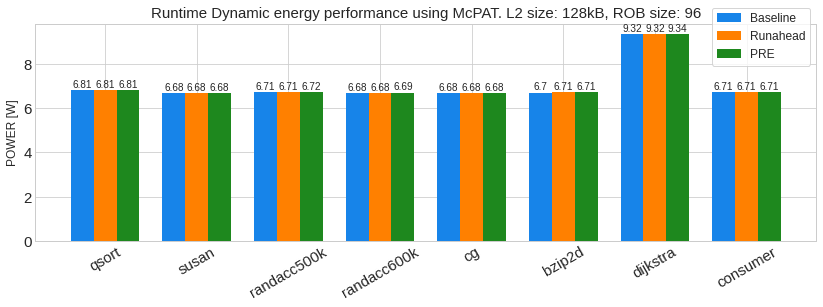

In [9]:
plt.style.use('seaborn-whitegrid')

SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 15

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

colors = ['#1784E9', '#FF8000', '#1E881E', '#C31253', '#B0C551', '#3CBBC0', 
          '#AF1B19', '#F498B0', '#68218A']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)
img_dir = "/home/marta/runahead/plotting_stats/images/"
styles = ['-', '-', '--', '-.', '-.', '-', '--', '-.', '-.']


def compare_benchmarks(df, benchmarks, robsize=96, cachesize=128, log=False):
    statistic = 'Power [W]'
    n_benches = len(benchmarks)
    
    def round2(value):
        return round(float(value), 2)
    
    def get_data_for_mode(mode):
        return np.array([round2(find_value(df, name, robsize, cachesize, mode)) for name in benchmarks])
        
    pre_scores = get_data_for_mode('pre')
    run_scores = get_data_for_mode('run')
    base_scores = get_data_for_mode('base')

    x = np.arange(len(benchmarks))  # the label locations
    width = 0.5  # the width of the bars
    bottom = 0
    
    fig, ax = plt.subplots()
    fig.set_size_inches(14,4)
    
    rects1 = ax.bar(x - width/2, base_scores - bottom, width/2, bottom=bottom, color=colors[0], label='Baseline')
    rects2 = ax.bar(x,  run_scores - bottom, width/2, bottom=bottom, color=colors[1], label='Runahead')
    rects3 = ax.bar(x + width/2, pre_scores - bottom, width/2, bottom=bottom, color=colors[2], label='PRE')
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(statistic.upper())
    ax.set_title("Runtime Dynamic energy performance using McPAT. L2 size: {}kB, ROB size: {}".format(cachesize, robsize))
    ax.set_xticks(x, benchmarks)
    ax.legend(loc='upper right', bbox_to_anchor=(1, 1.1),
          ncol=1, fancybox=True, frameon=True)
    if log:
        ax.set_yscale('log')
    ax.bar_label(rects1, padding=1)
    ax.bar_label(rects2, padding=1)
    ax.bar_label(rects3, padding=1)
    
    plt.xticks(rotation=30)
    
    fname = img_dir + statistic + str(robsize) + "_" + str(cachesize) + ".svg"
    print(fname)
    plt.savefig(fname, format='svg', bbox_inches='tight')
    plt.show()

robs = [64, 96, 128, 160, 192]
l2s=[128,256]
compare_benchmarks(df, all_benchs)
# for r in robs:
#     for c in l2s:
#         print(r,c)
#         compare_benchmarks(df, all_benchs, robsize=r, cachesize=c)

qsort           PRE ['0.08%', '0.05%', '0.04%', '0.03%', '0.02%']
qsort           RUN ['0.08%', '0.05%', '0.04%', '0.02%', '0.02%']
qsort           PRE/RUN ['0.00%', '0.00%', '0.00%', '0.01%', '0.00%']

susan           PRE ['0.02%', '0.02%', '0.01%', '0.01%', '0.01%']
susan           RUN ['0.02%', '0.02%', '0.02%', '0.02%', '0.02%']
susan           PRE/RUN ['0.00%', '0.00%', '0.00%', '0.00%', '0.00%']

randacc500k     PRE ['0.13%', '0.10%', '0.09%', '0.01%', '0.00%']
randacc500k     RUN ['0.04%', '0.04%', '0.05%', '0.04%', '0.05%']
randacc500k     PRE/RUN ['0.09%', '0.06%', '0.04%', '-0.03%', '-0.05%']

randacc600k     PRE ['0.15%', '0.14%', '0.11%', '0.03%', '0.00%']
randacc600k     RUN ['0.12%', '0.12%', '0.12%', '0.12%', '0.12%']
randacc600k     PRE/RUN ['0.03%', '0.02%', '-0.01%', '-0.09%', '-0.12%']

cg              PRE ['0.18%', '0.09%', '0.08%', '0.03%', '0.01%']
cg              RUN ['0.18%', '0.09%', '0.08%', '0.05%', '0.04%']
cg              PRE/RUN ['0.00%', '0.00%', '0.00%',

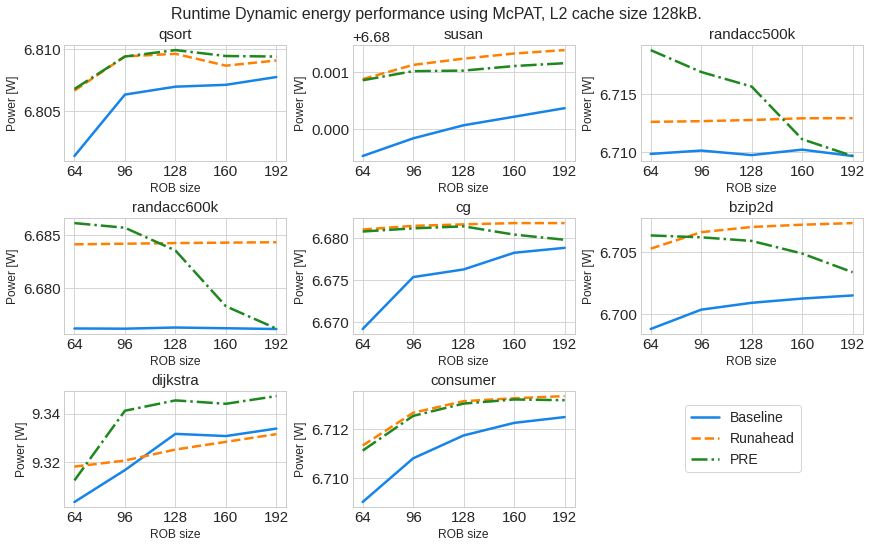

In [10]:
def analyze_param(df, benchmark, robsizes=[128], cachesizes=[64], ax=None, rmvBaselie=False):
    statistic = 'Power [W]'
    def round2(value):
        return value
    
    def get_cache_data_for_mode(mode, robsize, cachesizes):
        return np.array([round2(find_value(df, benchmark, robsize, c, mode)) for c in cachesizes])
    def get_rob_data_for_mode(mode, robsizes, cachesize):
        return np.array([round2(find_value(df, benchmark, r, cachesize, mode)) for r in robsizes])
    
    if len(robsizes) == 1:
        # analyzing cache sizes
        analyze_caches = True
        robsize = robsizes[0]
        pre_scores = get_cache_data_for_mode('pre', robsize, cachesizes)
        run_scores = get_cache_data_for_mode('run', robsize, cachesizes)
        base_scores = get_cache_data_for_mode('base', robsize, cachesizes)
    else:
        assert len(cachesizes) == 1
        analyze_caches = False
        cachesize = cachesizes[0]
        pre_scores = get_rob_data_for_mode('pre', robsizes, cachesize)
        run_scores = get_rob_data_for_mode('run', robsizes, cachesize)
        base_scores = get_rob_data_for_mode('base', robsizes, cachesize)
    
    x = np.arange(len(pre_scores))  # the label locations
    width = 0.35  # the width of the bars
    bottom = 0
    
    if not ax:
        fig, ax = plt.subplots()
        fig.set_size_inches(4, 3)
    
    l = 2.5
    if not rmvBaselie:
        ax.plot(base_scores - bottom, label = 'Baseline', linewidth=l, linestyle='-', color=colors[0])
    ax.plot(run_scores - bottom, label = 'Runahead', linewidth=l, linestyle='--', color=colors[1])
    ax.plot(pre_scores - bottom, label = 'PRE', linewidth=l, linestyle='-.', color=colors[2])
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    label = statistic
    if statistic == 'cpi' or statistic == 'ipc':
        label = statistic.upper() 
    ax.set_ylabel(label)
    if analyze_caches:
        ax.set_title("{}".format(benchmark))    
        ax.set_xticks(x, cachesizes)
        ax.set_xlabel('L2 Cache size')
    else:
        ax.set_title("{}".format(benchmark))
        ax.set_xticks(x, robsizes)
        ax.set_xlabel('ROB size')
    
    return ax, base_scores, run_scores, pre_scores
def analyze_all(data, robs, caches, height=7.5, rmvBaselie=False, name=None):
    cols = 3
    rows = 3
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(12, height),
                        constrained_layout=True)
    stat = 'Power [W]'
    
    for i in range(len(all_benchs)):
        r = int(i / rows)
        c = i % cols 
        ax, base_scores, run_scores, pre_scores = \
            analyze_param(data, all_benchs[i], robsizes=robs, cachesizes=caches, ax=axs[r, c], rmvBaselie=rmvBaselie)  
        pre = (np.around(pre_scores/base_scores, decimals=4)-1)*100
        run = (np.around(run_scores/base_scores, decimals=4)-1)*100
        cmp = (np.around(pre_scores/run_scores, decimals=4)-1)*100
        print(all_benchs[i].ljust(15), "PRE",  ['{:.2f}%'.format(a) for a in pre])
        print(all_benchs[i].ljust(15), "RUN",  ['{:.2f}%'.format(a) for a in run])
        print(all_benchs[i].ljust(15), "PRE/RUN", ['{:.2f}%'.format(a) for a in cmp])
        print()
    if len(all_benchs) == 8:
        axs[-1, -1].axis('off')
        handles, labels = axs[0,0].get_legend_handles_labels()
        
        fig.legend(handles, labels, loc='lower right', bbox_to_anchor=(0.93, 0.12),
                   fancybox=True, frameon=True, fontsize=14)
    
    analyze_caches = True if len(robs) == 1 else False
    
    if not name:
        name = stat
    fname = img_dir + name + ".svg"
    if stat == 'cpi' or stat == 'ipc':
        stat = stat.upper() 
    fig.suptitle("Runtime Dynamic energy performance using McPAT, {}.".format(
        "ROB size {}".format(robs[0]) if analyze_caches else "L2 cache size {}kB".format(caches[0])),
                fontsize=16)
    
    print(fname)
    plt.savefig(fname, format='svg', bbox_inches='tight')
    
analyze_all(df, robs, [128])


In [11]:
find_value(df, 'susan', 64, 128, 'base')

6.67952